 ## Credit Card Dataset for Clustering

👉 This study will examine the dataset named as **"Credit Card Dataset for Clustering"** at Kaggle website [external link text](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

This case requires to develop a customer segmentation to define marketing strategy. 

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [39]:
df=pd.read_csv('CC GENERAL.csv')

In [40]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [42]:
df.shape

(8950, 18)

In [43]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [44]:
df.CREDIT_LIMIT=df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())

In [45]:
df.MINIMUM_PAYMENTS=df.MINIMUM_PAYMENTS.fillna(0)

In [46]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [47]:
abs(df.corr()['CREDIT_LIMIT']).sort_values(ascending=False)

CREDIT_LIMIT                        1.000000
BALANCE                             0.531267
PAYMENTS                            0.421852
PURCHASES                           0.356959
ONEOFF_PURCHASES                    0.319721
CASH_ADVANCE                        0.303983
ONEOFF_PURCHASES_FREQUENCY          0.295030
PURCHASES_TRX                       0.272877
INSTALLMENTS_PURCHASES              0.256496
CASH_ADVANCE_TRX                    0.149699
TENURE                              0.139034
CASH_ADVANCE_FREQUENCY              0.132616
MINIMUM_PAYMENTS                    0.127556
PURCHASES_FREQUENCY                 0.119778
BALANCE_FREQUENCY                   0.095795
PURCHASES_INSTALLMENTS_FREQUENCY    0.060752
PRC_FULL_PAYMENT                    0.055671
Name: CREDIT_LIMIT, dtype: float64

In [48]:
x=df[["BALANCE","BALANCE_FREQUENCY","PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]]

In [49]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.512904599944105
Number of cluster 3,silhouette0.46751440881657236
Number of cluster 4,silhouette0.461278247743383
Number of cluster 5,silhouette0.3859240783672197
Number of cluster 6,silhouette0.380969710686429
Number of cluster 7,silhouette0.3911158235291133
Number of cluster 8,silhouette0.3908387150349908
Number of cluster 9,silhouette0.3602183791421665


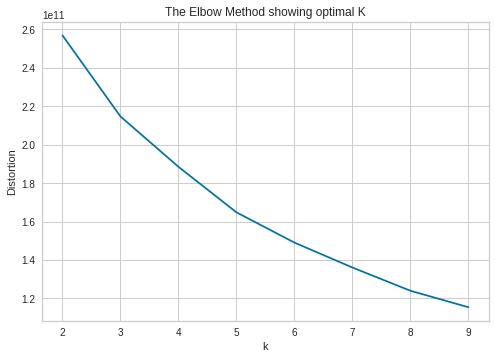

In [50]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

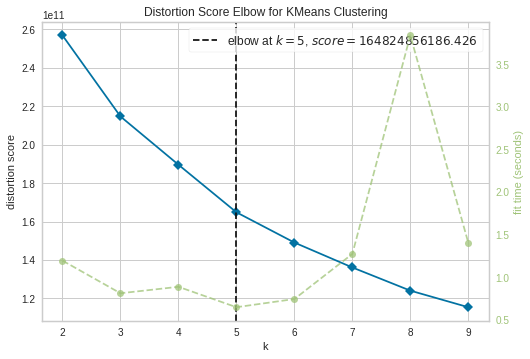

In [51]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [52]:
model=KMeans(n_clusters=5)

In [53]:
model=model.fit(x)

In [54]:
tahmin=model.predict(x) #sadece x var

In [55]:
tahmin

array([1, 0, 3, ..., 1, 1, 1], dtype=int32)

In [56]:
x['cluster']=tahmin

In [57]:
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,95.40,0.000000,1000.0,201.802084,139.509787,0.000000,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,0.00,0.000000,7500.0,622.066742,627.284787,0.000000,3
3,1666.670542,0.636364,1499.00,0.00,205.788017,7500.0,0.000000,0.000000,0.000000,3
4,817.714335,1.000000,16.00,0.00,0.000000,1200.0,678.334763,244.791237,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1000.0,325.594462,48.886365,0.500000,1
8946,19.183215,1.000000,300.00,300.00,0.000000,1000.0,275.861322,0.000000,0.000000,1
8947,23.398673,0.833333,144.40,144.40,0.000000,1000.0,81.270775,82.418369,0.250000,1
8948,13.457564,0.833333,0.00,0.00,36.558778,500.0,52.549959,55.755628,0.250000,1


In [58]:
silhouette_score(x,tahmin)

0.386516263812396

In [60]:
x.cluster.value_counts()

1    5446
3    2462
0     882
4     104
2      56
Name: cluster, dtype: int64

In [61]:
d={0:"az gelirli müsteri",1:"çok yüksek gelirli müsteri",2:"orta gelirli müsteri",3:"yüksek gelirli müsteri",4:"kaymaklı gelirli müsteri"}
x['müsteri']=x.cluster.map(d)

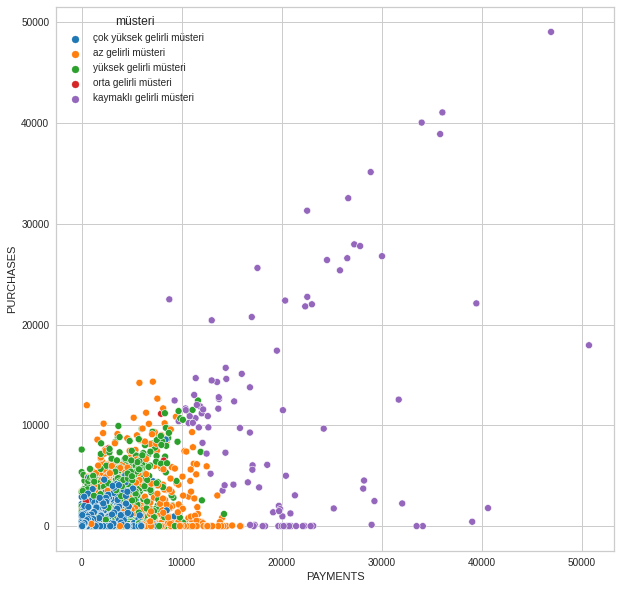

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(x["PAYMENTS"], 
                df["PURCHASES"], hue= x.müsteri,palette= "tab10");

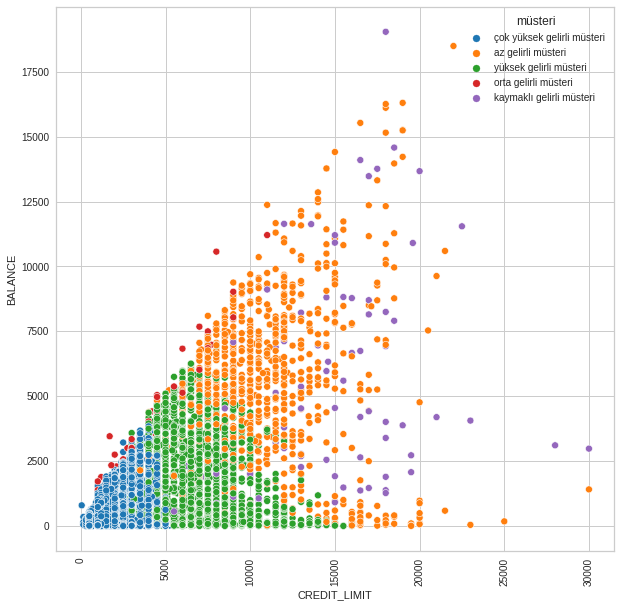

In [63]:
plt.figure(figsize=(10,10))
sns.scatterplot(x.CREDIT_LIMIT,x.BALANCE, hue= x.müsteri,palette= "tab10")
plt.xticks(rotation=90);

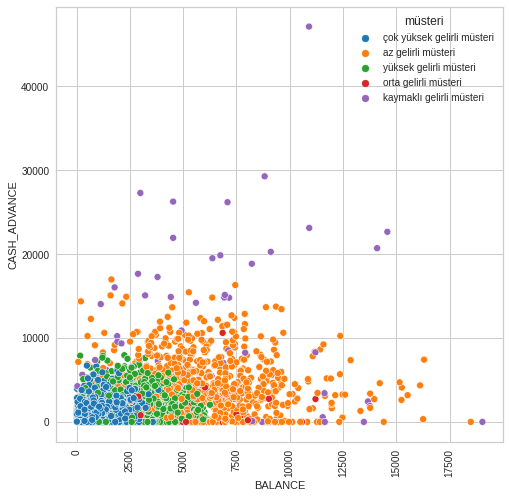

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(x.BALANCE,x.CASH_ADVANCE, hue= x.müsteri,palette= "tab10")
plt.xticks(rotation=90);

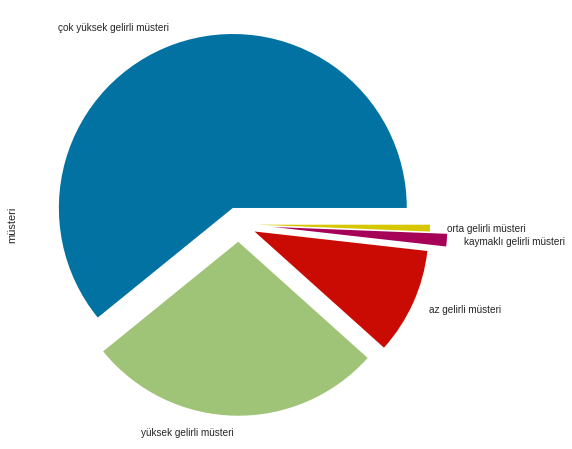

In [68]:
plt.figure(figsize=(8,8)) 
#df['month_name'].value_counts().plot.pie()
explode=[0.1,0.1,0.1,0.2,0.1]
#pastaları ayırmak için explode yazılıp ayırmak istenilen 0.2 gibi yazılır ve ayırırx
x.müsteri.value_counts().plot.pie(explode=explode)